In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import accuracy_score, rand_score
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target 

df.head()

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [67]:
df.isna().sum() 

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [68]:
df[df.duplicated()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
142,5.8,2.7,5.1,1.9,2


In [69]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


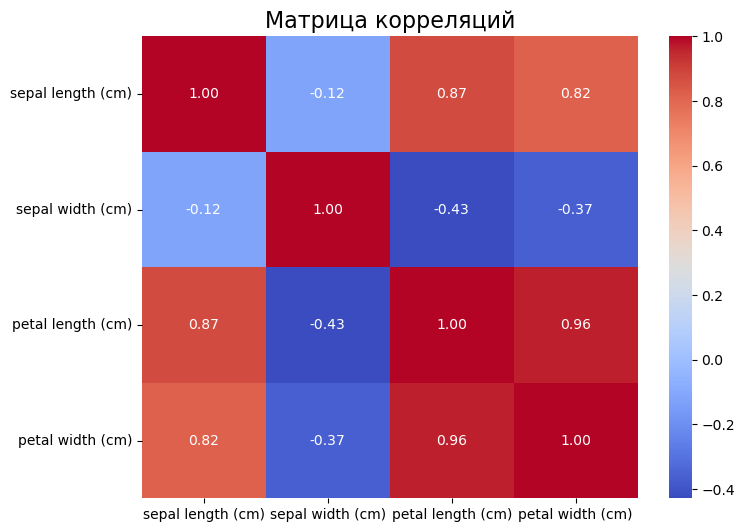

In [70]:
corr = df.drop('species', axis=1).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Матрица корреляций', fontsize=16)
plt.show()


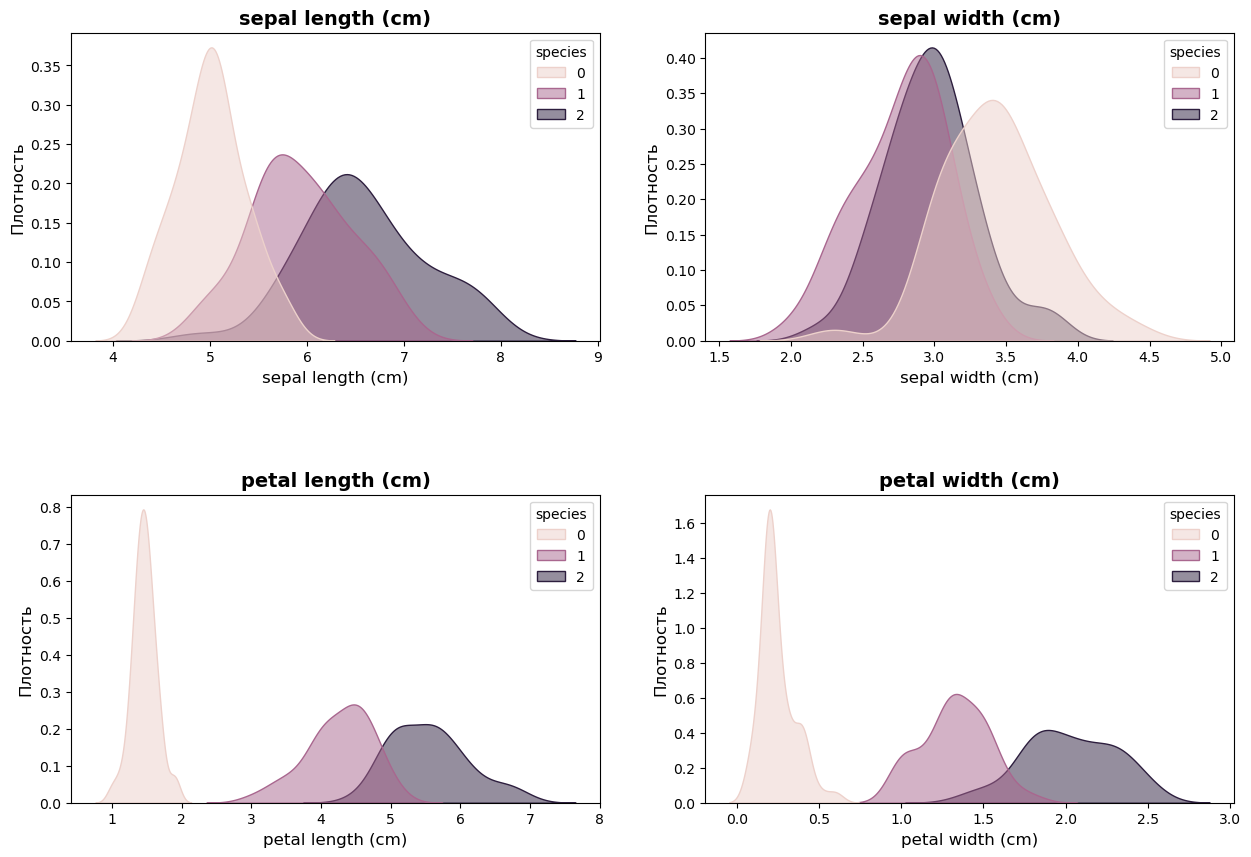

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

columns = df.columns[:-1] 

for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.kdeplot(data=df, x=column, hue='species', fill=True, alpha=0.5, ax=ax)
    ax.set_title(column, fontweight='bold', fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Плотность', fontsize=12)

plt.show()

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(df.iloc[:, :-1]) 
y = df['species'] 

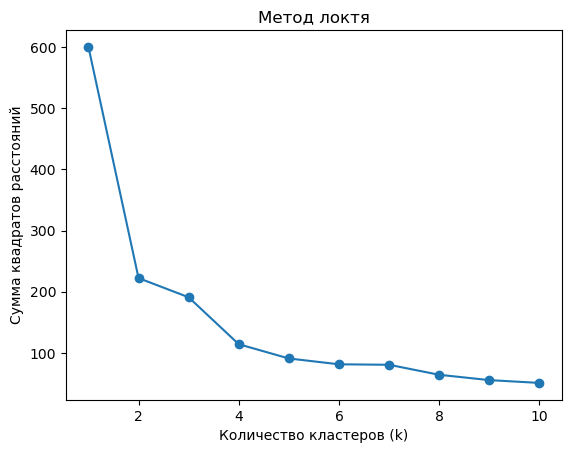

In [73]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Метод локтя')
plt.show()


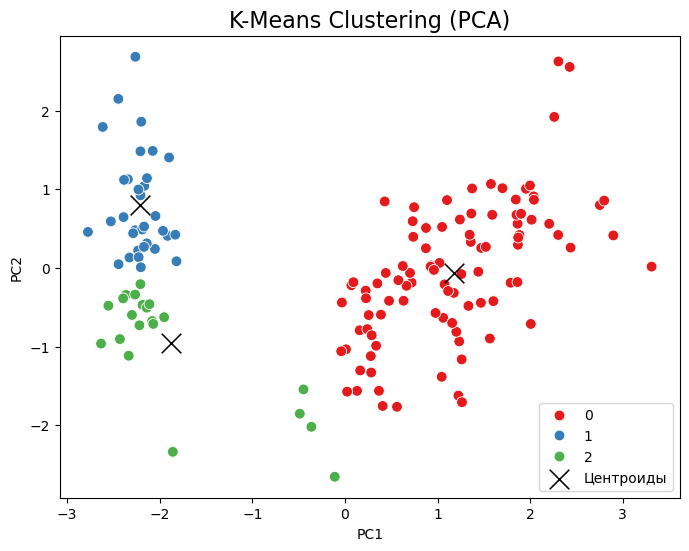

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto').fit(X)
pred_k = kmeans.labels_
centroids = kmeans.cluster_centers_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=pred_k, palette='Set1', s=60)
sns.scatterplot(x=pca.transform(centroids)[:, 0], y=pca.transform(centroids)[:, 1], 
                marker='x', s=200, color='black', label='Центроиды')
plt.title('K-Means Clustering (PCA)', fontsize=16)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

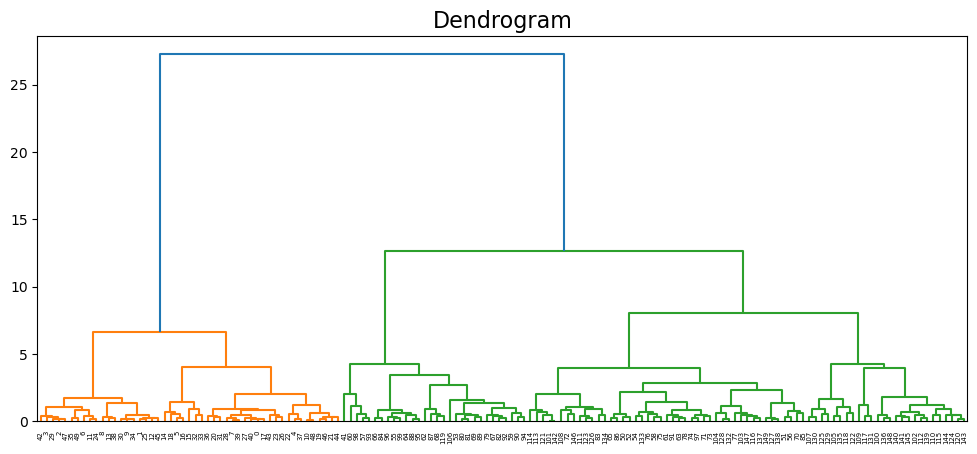

In [ ]:
clustering_ward = AgglomerativeClustering(n_clusters=3).fit(X)
pred_ward = clustering_ward.labels_


plt.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram', fontsize=16)
plt.show()

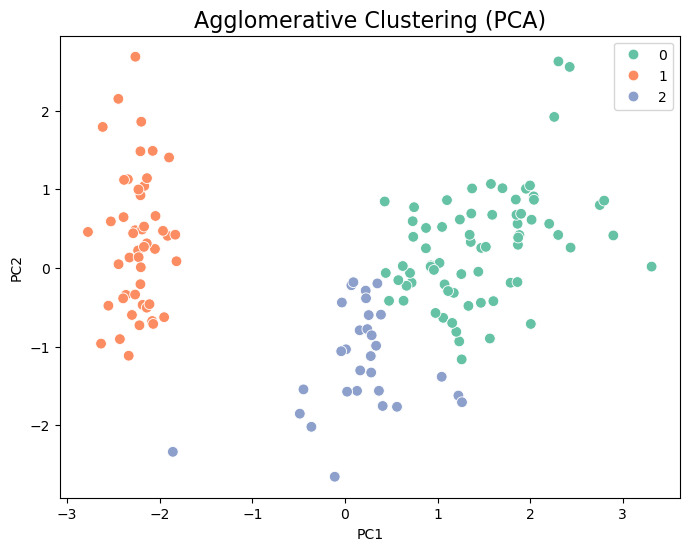

In [76]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=pred_ward, palette='Set2', s=60)
plt.title('Agglomerative Clustering (PCA)', fontsize=16)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

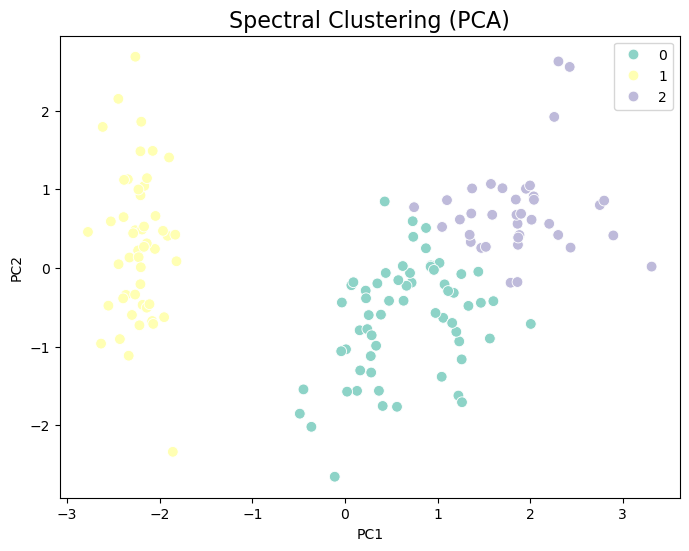

In [77]:
clustering_sp = SpectralClustering(n_clusters=3, random_state=42).fit(X)
pred_sp = clustering_sp.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=pred_sp, palette='Set3', s=60)
plt.title('Spectral Clustering (PCA)', fontsize=16)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [78]:
rs_k = rand_score(y, pred_k)
rs_ward = rand_score(y, pred_ward)
rs_sp = rand_score(y, pred_sp)

print(f'K-Means Rand Score: {rs_k}')
print(f'Agglomerative Clustering Rand Score: {rs_ward}')
print(f'Spectral Clustering Rand Score: {rs_sp}')

K-Means Rand Score: 0.7214317673378076
Agglomerative Clustering Rand Score: 0.8252348993288591
Spectral Clustering Rand Score: 0.8415212527964205
